In [14]:
import pandas as pd
from MODM_Tool_Modules import gathering_data_function as gt
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import math
import re
import os
import datetime
import seaborn as sns
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_plotting_results_function as tp_plot

In [16]:
decision_matrix, data_filename, weights, normalized_weights, beneficial_criteria, non_beneficial_criteria = gt.gathering_data(
    'C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/Tool/Data/data_input/mock5_data.csv')
weights_series = pd.Series(weights)
print(weights_series)

                      CAPEX (M$)  OPEX (M$/year)  Human Health (DALYs)  \
Landfilling                   30             2.0                  0.20   
Incineration                  70             5.0                  0.50   
Mechanical Recycling          60             7.0                  0.10   
Pyrolysis                     80            10.0                  0.25   
Gasification                  90             9.0                  0.30   
Depolymerization              85             8.5                  0.20   

                      Ecosystems (PDF*m^2*yr)  Resource Depletion (kg Sb eq)  \
Landfilling                              1000                             80   
Incineration                              800                             70   
Mechanical Recycling                      500                             60   
Pyrolysis                                 275                             40   
Gasification                              350                             70   
D

In [20]:
def normalize_matrix(decision_matrix):
    # Normalize the decision matrix with vector normalization
    normalized_matrix = decision_matrix.div(
        decision_matrix.pow(2).sum(
            axis=0).pow(0.5), axis=1)
    # print(normalized_matrix)
    return normalized_matrix
normalized_matrix = normalize_matrix(decision_matrix)
print(normalized_matrix)

                      CAPEX (M$)  OPEX (M$/year)  Human Health (DALYs)  \
Landfilling             0.170046        0.109888              0.284988   
Incineration            0.396774        0.274721              0.712470   
Mechanical Recycling    0.340092        0.384610              0.142494   
Pyrolysis               0.453456        0.549442              0.356235   
Gasification            0.510138        0.494498              0.427482   
Depolymerization        0.481797        0.467026              0.284988   

                      Ecosystems (PDF*m^2*yr)  Resource Depletion (kg Sb eq)  \
Landfilling                          0.677577                       0.522697   
Incineration                         0.542062                       0.457360   
Mechanical Recycling                 0.338788                       0.392023   
Pyrolysis                            0.186334                       0.261349   
Gasification                         0.237152                       0.457360   
D

In [21]:
def apply_weights(normalized_matrix, normalized_weights):
    # Multiply the normalized decision matrix by the normalized weights
    weighted_normalized_matrix = normalized_matrix.multiply(
        normalized_weights, axis=1)
    # print(weighted_normalized_matrix)
    return weighted_normalized_matrix
weighted_normalized_matrix = apply_weights(normalized_matrix, normalized_weights)
print(weighted_normalized_matrix)

                      CAPEX (M$)  OPEX (M$/year)  Human Health (DALYs)  \
Landfilling             0.014472        0.018704              0.036381   
Incineration            0.033768        0.046761              0.090954   
Mechanical Recycling    0.028944        0.065465              0.018191   
Pyrolysis               0.038592        0.093522              0.045477   
Gasification            0.043416        0.084170              0.054572   
Depolymerization        0.041004        0.079494              0.036381   

                      Ecosystems (PDF*m^2*yr)  Resource Depletion (kg Sb eq)  \
Landfilling                          0.086499                       0.088970   
Incineration                         0.069199                       0.077849   
Mechanical Recycling                 0.043250                       0.066727   
Pyrolysis                            0.023787                       0.044485   
Gasification                         0.030275                       0.077849   
D

In [23]:
def determine_ideal_best_and_worst(
        weighted_normalized_matrix,
        beneficial_criteria):
    # Determine the ideal best and worst values for each criterion
    ideal_best = {}
    ideal_worst = {}

    for criterion in weighted_normalized_matrix.columns:
        if criterion in beneficial_criteria:
            ideal_best[criterion] = weighted_normalized_matrix[criterion].max()
            ideal_worst[criterion] = weighted_normalized_matrix[criterion].min()
        else:
            ideal_best[criterion] = weighted_normalized_matrix[criterion].min()
            ideal_worst[criterion] = weighted_normalized_matrix[criterion].max()

    # print("Ideal Best Values:", ideal_best)
    # print("Ideal Worst Values:", ideal_worst)
    return ideal_best, ideal_worst
ideal_best, ideal_worst = determine_ideal_best_and_worst(weighted_normalized_matrix, beneficial_criteria)
print("Ideal Bests\n")
ideal_best_series = pd.Series(ideal_best)
print(ideal_best_series)
print("Ideal Worsts\n")
ideal_worst_series = pd.Series(ideal_worst)
print(ideal_worst_series)

Ideal Bests

CAPEX (M$)                       0.014472
OPEX (M$/year)                   0.018704
Human Health (DALYs)             0.018191
Ecosystems (PDF*m^2*yr)          0.023787
Resource Depletion (kg Sb eq)    0.044485
Reliability (%)                  0.069559
Climate Change (kg CO2 eq)       0.041364
dtype: float64
Ideal Worsts

CAPEX (M$)                       0.043416
OPEX (M$/year)                   0.093522
Human Health (DALYs)             0.090954
Ecosystems (PDF*m^2*yr)          0.086499
Resource Depletion (kg Sb eq)    0.088970
Reliability (%)                  0.047593
Climate Change (kg CO2 eq)       0.110304
dtype: float64


In [24]:
def calculate_euclidian_distance(
        weighted_normalized_matrix,
        ideal_best,
        ideal_worst):
    # Calculate the Euclidean distances from the ideal best and worst values
    D_plus = ((weighted_normalized_matrix - ideal_best)
              ** 2).sum(axis=1).pow(0.5)
    D_minus = ((weighted_normalized_matrix - ideal_worst)
               ** 2).sum(axis=1).pow(0.5)
    # print("Distances from Ideal Best (D+):")
    # print(D_plus)
    # print("\nDistances from Ideal Worst (D-):")
    # print(D_minus)
    return D_plus, D_minus
D_plus, D_minus = calculate_euclidian_distance(weighted_normalized_matrix, ideal_best, ideal_worst)
print("Distance from ideal best\n")
D_plus_series = pd.Series(D_plus)
print(D_plus_series)
print("Distance from ideal worst\n")
D_minus_series = pd.Series(D_minus)
print(D_minus_series)

Distance from ideal best

Landfilling             0.104858
Incineration            0.106554
Mechanical Recycling    0.058225
Pyrolysis               0.084654
Gasification            0.090967
Depolymerization        0.069913
dtype: float64
Distance from ideal worst

Landfilling             0.099479
Incineration            0.061629
Mechanical Recycling    0.116317
Pyrolysis               0.107132
Gasification            0.087964
Depolymerization        0.110711
dtype: float64


In [25]:
def calculate_performance_score(D_plus, D_minus):
    # Calculate the performance score for each alternative
    S = D_minus / (D_plus + D_minus)
    # print("Performance Scores:")
    # print(S)
    return S
S = calculate_performance_score(D_plus, D_minus)
S_series = pd.Series(S)
print(S_series)

Landfilling             0.486837
Incineration            0.366441
Mechanical Recycling    0.666412
Pyrolysis               0.558602
Gasification            0.491610
Depolymerization        0.612937
dtype: float64


In [27]:
def ranking(S):
    # Rank the alternatives based on their performance scores
    ranked_alternatives = S.sort_values(ascending=False)
    ranks = S.rank(ascending=False).astype(int)
    # print(ranks)
    # print("\nRanked Alternatives:")
    # print(ranked_alternatives)
    return ranked_alternatives, ranks
ranked_alternatives, ranks = ranking(S)
print(ranked_alternatives)
print(ranks)

Mechanical Recycling    0.666412
Depolymerization        0.612937
Pyrolysis               0.558602
Gasification            0.491610
Landfilling             0.486837
Incineration            0.366441
dtype: float64
Landfilling             5
Incineration            6
Mechanical Recycling    1
Pyrolysis               3
Gasification            4
Depolymerization        2
dtype: int32



Ranked Alternatives:
Mechanical Recycling    0.666412
Depolymerization        0.612937
Pyrolysis               0.558602
Gasification            0.491610
Landfilling             0.486837
Incineration            0.366441
dtype: float64


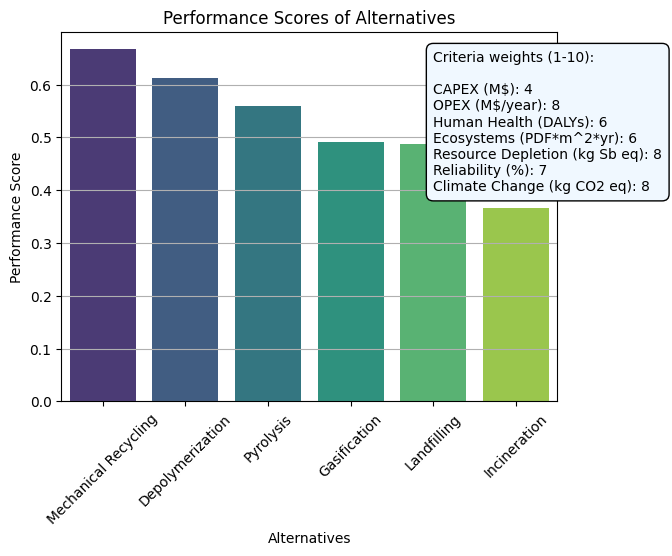

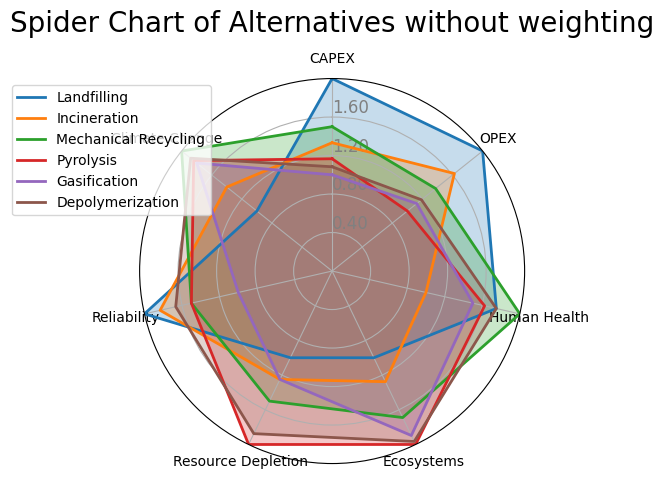

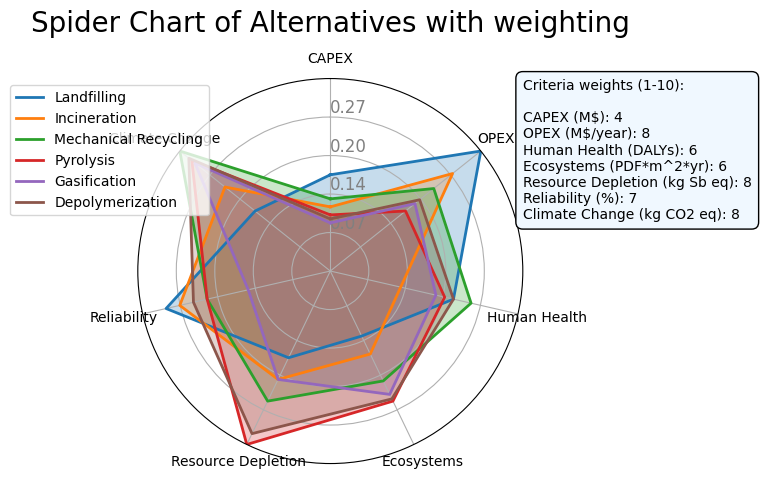

In [28]:
user_input = 'no'
directory = None
tp_plot.results_visualization_topsis(ranked_alternatives, weighted_normalized_matrix, beneficial_criteria, weights, normalized_weights, S, user_input, directory, decision_matrix)